# import libraries

In [181]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt

# Read file

In [182]:
df = pd.read_csv("Customer.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [183]:
df.shape

(200, 5)

In [184]:
df = df.dropna()
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [185]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [186]:
X = np.asarray(df[['Gender', 'Age', 'Annual Income (k$)','Spending Score (1-100)']])
X[0:5]

array([['Male', 19, 15, 39],
       ['Male', 21, 15, 81],
       ['Female', 20, 16, 6],
       ['Female', 23, 16, 77],
       ['Female', 31, 17, 40]], dtype=object)

# Change to numbers only for every column

In [187]:
label_sex = preprocessing.LabelEncoder()
label_sex.fit(X[:, 1])
X[:,0] = label_sex.transform(X[:,1])
X[0:5]

array([[1, 19, 15, 39],
       [3, 21, 15, 81],
       [2, 20, 16, 6],
       [5, 23, 16, 77],
       [13, 31, 17, 40]], dtype=object)

# Normalize Data

In [188]:
scaler = StandardScaler()
dataSet = scaler.fit_transform(X)
dataSet[0:5]

array([[-1.44683356, -1.42456879, -1.73899919, -0.43480148],
       [-1.29979763, -1.28103541, -1.73899919,  1.19570407],
       [-1.37331559, -1.3528021 , -1.70082976, -1.71591298],
       [-1.15276169, -1.13750203, -1.70082976,  1.04041783],
       [-0.56461797, -0.56336851, -1.66266033, -0.39597992]])

# plot data

## age vs income plot

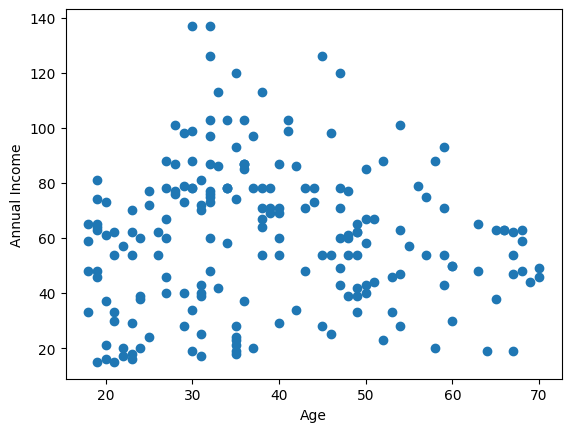

In [189]:
plt.scatter(X[:, 1], X[:, 2])
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

here can not find any group between age vs income let's check other plots

## age vs spending plot

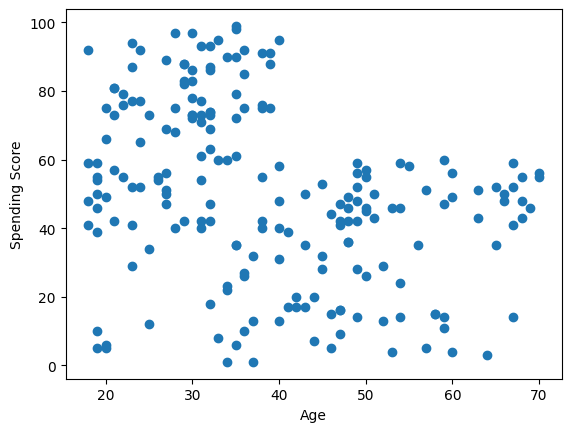

In [190]:
plt.scatter(X[:, 1], X[:, 3])
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

## income vs spending plot

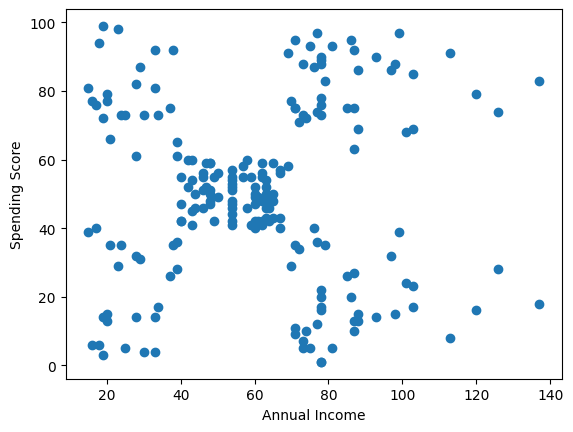

In [191]:
plt.scatter(X[:, 2], X[:, 3])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

here based on plot it looks like we have 5 categories in income vs spending score so let's work in this plot

In [192]:
X_new = dataSet[:, 2:4]
X_new[0:5]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

# First model -> Kmeans

In [172]:
clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X_new)

,n_clusters,5
,init,'k-means++'
,n_init,12
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [173]:
labels = k_means.labels_
labels

array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0,
       3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [174]:
df["Cluster_num_kmeans"] = labels
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_num_kmeans
0,1,Male,19,15,39,3
1,2,Male,21,15,81,2
2,3,Female,20,16,6,3
3,4,Female,23,16,77,2
4,5,Female,31,17,40,3


In [175]:
new_df = df.drop(columns=["Gender"])
new_df.groupby("Cluster_num_kmeans").mean()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Cluster_num_kmeans,,,,
0,86.320988,42.716049,55.296296,49.518519
1,164.371429,41.114286,88.200000,17.114286
2,23.090909,25.272727,25.727273,79.363636
3,23.000000,45.217391,26.304348,20.913043
4,162.000000,32.692308,86.538462,82.128205


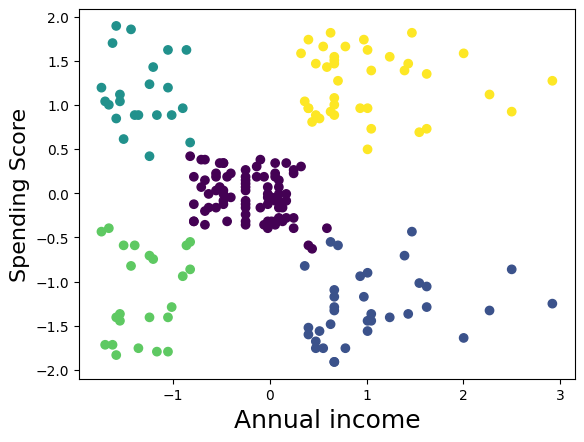

In [176]:
#area = np.pi * ( X[:, 0])**2  
plt.scatter(X_new[:, 0], X_new[:, 1], c=labels.astype(float), alpha=1)
plt.xlabel('Annual income', fontsize=18)
plt.ylabel('Spending Score', fontsize=16)
plt.show()

## here we have 5 clusters

so let's check model based on age vs income

In [199]:
X_new2 = dataSet[:, 1:3]
X_new2[0:5]

array([[-1.42456879, -1.73899919],
       [-1.28103541, -1.73899919],
       [-1.3528021 , -1.70082976],
       [-1.13750203, -1.70082976],
       [-0.56336851, -1.66266033]])

In [200]:
clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X_new2)

,n_clusters,5
,init,'k-means++'
,n_init,12
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [201]:
labels = k_means.labels_
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       4, 1, 2, 2, 1, 4, 1, 1, 1, 3, 4, 4, 3, 4, 1, 4, 1, 4, 3, 4, 1, 3,
       3, 4, 1, 3, 4, 4, 3, 3, 4, 3, 4, 3, 3, 4, 1, 3, 4, 3, 1, 4, 1, 1,
       1, 3, 4, 3, 3, 3, 1, 4, 4, 4, 3, 4, 4, 4, 3, 3, 4, 4, 4, 4, 4, 4,
       3, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 4, 3, 3, 3, 4, 4, 4, 4,
       4, 3, 4, 3, 3, 3, 4, 3, 3, 3, 4, 0, 4, 3, 0, 3, 0, 3, 0, 0, 4, 3,
       4, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

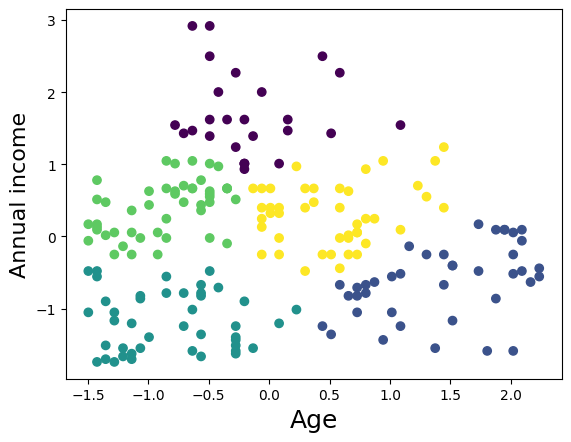

In [202]:
plt.scatter(X_new2[:, 0], X_new2[:, 1], c=labels.astype(float), alpha=1)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Annual income', fontsize=16)
plt.show()

# Result: with Kmeans with manage to get 5 clusters

# Second Model -> hierarchical

# find distance with sklearn

In [210]:
from sklearn.cluster import AgglomerativeClustering 

In [211]:
agglom = AgglomerativeClustering(n_clusters = 5, linkage="complete")
agglom.fit(X_new)

,n_clusters,5
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'complete'
,distance_threshold,None
,compute_distances,False


In [212]:
agglom.labels_

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 4,
       1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

In [213]:
df['cluster_num_hier'] = agglom.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_num_hier
0,1,Male,19,15,39,1
1,2,Male,21,15,81,3
2,3,Female,20,16,6,1
3,4,Female,23,16,77,3
4,5,Female,31,17,40,1


change column name easy to use in plot

In [215]:
df = df.rename(columns={
    "Annual Income (k$)": "income",
    "Spending Score (1-100)": "spend"
})
df

,CustomerID,Gender,Age,income,spend,cluster_num_hier
0,1,Male,19,15,39,1
1,2,Male,21,15,81,3
2,3,Female,20,16,6,1
3,4,Female,23,16,77,3
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,2
197,198,Male,32,126,74,0
198,199,Male,32,137,18,2


# income vs spend score

C:\Users\morteza\AppData\Local\Temp\ipykernel_14836\526255237.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.income, subset.spend, s= subset.Age*10, c=color, label='cluster'+str(label),alpha=0.5)
C:\Users\morteza\AppData\Local\Temp\ipykernel_14836\526255237.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.income, subset.spend, s= subset.Age*10, c=color, label='cluster'+str(labe

Text(0, 0.5, 'Spend Score')

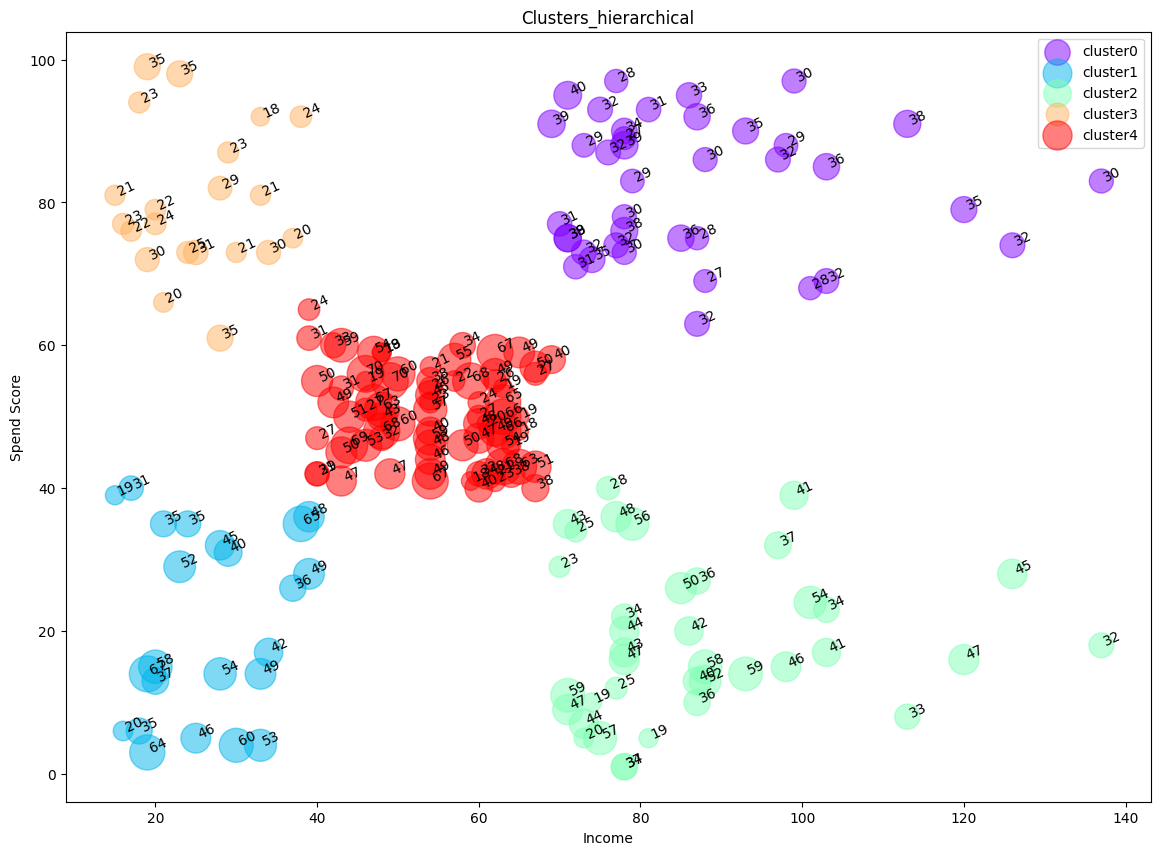

In [216]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(14,10))

for color, label in zip(colors, cluster_labels):
    subset = df[df.cluster_num_hier == label]
    for i in subset.index:
            plt.text(subset.income[i], subset.spend[i],str(subset['Age'][i]), rotation=25) 
    plt.scatter(subset.income, subset.spend, s= subset.Age*10, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters_hierarchical')
plt.xlabel('Income')
plt.ylabel('Spend Score')

## here from plot above it looks like hierarchial was better in separating than kmeans so let's go for third model

# model 3 -> DBSCAN

In [218]:
from sklearn.cluster import DBSCAN

In [255]:
epsilon = 0.35
minSamples = 5
db = DBSCAN(eps = epsilon, min_samples = minSamples).fit(X_new)
labels = db.labels_
labels

array([ 2,  0,  1,  0,  2,  0,  1, -1,  1,  0,  1, -1,  1,  0,  1,  0,  2,
        0,  2, -1,  2,  0,  1,  0,  1,  0,  2,  0,  2,  0,  1,  0,  1, -1,
        1,  0,  1,  0, -1,  0,  3, -1,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  4,  3,  4,  3,  4,  5,  4,  5,  4,  3,  4,  5,  4,
        5,  4,  5,  4,  5,  4,  3,  4,  5,  4,  3,  4,  5,  4,  5,  4,  5,
        4,  5,  4,  5,  4,  5,  4,  3,  4,  5,  4,  5,  4,  5,  4,  5, -1,
        5,  4,  5,  4,  5,  4,  5,  4,  5,  4, -1,  4,  5,  4, -1, -1, -1,
       -1, -1,  4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [256]:
core_sample_mask = np.zeros_like(db.labels_, dtype = bool)
core_sample_mask[db.core_sample_indices_] = True
core_sample_mask

array([False,  True,  True,  True, False,  True,  True, False, False,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True, False,  True,
       False,  True, False, False,  True, False, False, False,  True,
       False,  True, False, False,  True, False,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,

In [257]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

6

In [258]:
unique_labels = set(labels)
unique_labels

{np.int64(-1),
 np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5)}

In [259]:
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

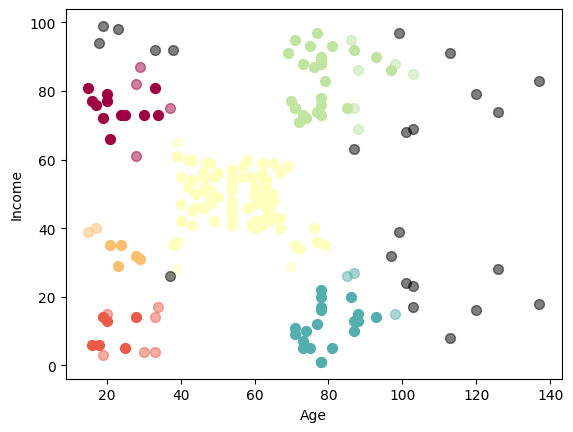

In [260]:
# Plot the points with colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = X[class_member_mask & core_sample_mask]
    plt.scatter(xy[:, 2], xy[:, 3],s=50, c=[col], marker=u'o', alpha=1)

    # Plot the outliers
    xy = X[class_member_mask & ~core_sample_mask]
    plt.scatter(xy[:, 2], xy[:, 3],s=50, c=[col], marker=u'o', alpha=0.5)

    plt.xlabel("Income")
    plt.ylabel("Spending")

### here with DBSCAN we get 6 clusters let's work with it see we can get 5 clusters

In [314]:
epsilon = 0.37
minSamples = 8
db = DBSCAN(eps = epsilon, min_samples = minSamples).fit(X_new)
labels = db.labels_
labels

array([-1,  0,  1,  0, -1,  0,  1, -1,  1,  0, -1, -1, -1,  0,  1,  0, -1,
        0, -1, -1, -1,  0,  1,  0,  1,  0, -1, -1, -1, -1,  1,  0,  1, -1,
       -1, -1, -1,  0, -1, -1,  2, -1,  2,  2, -1,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  3,  2,  3,  2,  3,  4,  3,  4,  3,  2,  3,  4,  3,
        4,  3,  4,  3,  4,  3,  2,  3,  4,  3,  2,  3,  4,  3,  4,  3,  4,
        3,  4,  3,  4,  3,  4,  3,  2,  3,  4,  3,  4,  3,  4,  3,  4, -1,
        4,  3,  4,  3,  4,  3,  4, -1,  4, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [315]:
core_sample_mask = np.zeros_like(db.labels_, dtype = bool)
core_sample_mask[db.core_sample_indices_] = True
core_sample_mask

array([False, False, False, False, False,  True, False, False, False,
        True, False, False, False,  True, False,  True, False, False,
       False, False, False,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,

In [316]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

5

In [317]:
unique_labels = set(labels)
unique_labels

{np.int64(-1), np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)}

In [318]:
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

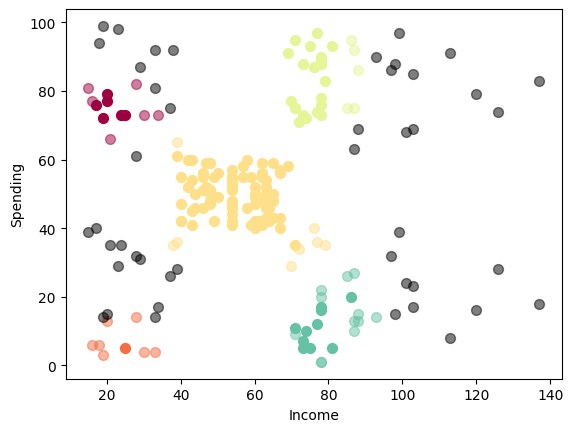

In [319]:
# Plot the points with colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = X[class_member_mask & core_sample_mask]
    plt.scatter(xy[:, 2], xy[:, 3],s=50, c=[col], marker=u'o', alpha=1)

    # Plot the outliers
    xy = X[class_member_mask & ~core_sample_mask]
    plt.scatter(xy[:, 2], xy[:, 3],s=50, c=[col], marker=u'o', alpha=0.5)

    plt.xlabel("Income")
    plt.ylabel("Spending")

In [321]:
out_rider = []
for label in labels:
    if label == -1:
        out_rider.append(label)
len(out_rider)

45

# here I was able to get 5 clusters but 45 out of 200 considered as outriders. so here we droped a lot of people however we find clusters that are more similar to each other

# Conclution: At first by looking at plot I was able to tell we can divide them to 5 clusters and I was able to prove it by 3 models